# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [8]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [9]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0] = self.pos
        for i in range (n):
            positions[i+1] = positions[i]+self.possibleSteps[numpy.random.choice(range(self.npossible))]
        return positions

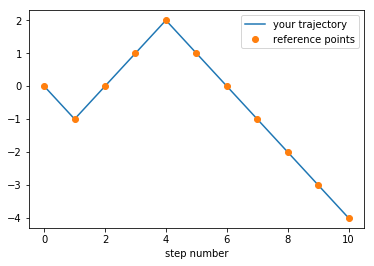

In [10]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

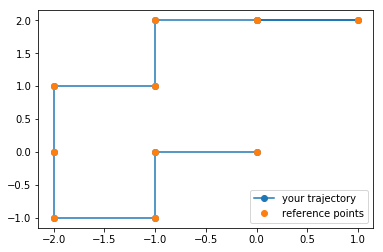

In [11]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

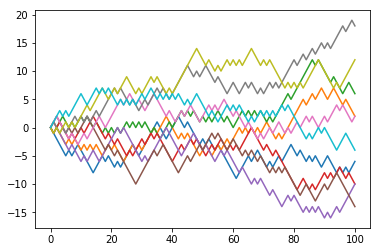

In [12]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


In [13]:
nsteps = 1000
ndim = 1
nwalkers = 100

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'Average squared distance in different dimensions')

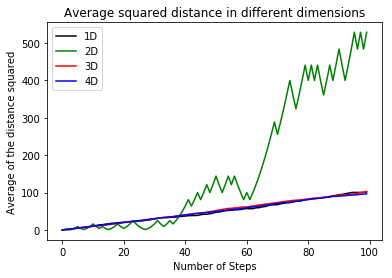

In [14]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []

c=[]
for i in range (nwalkers):
    w = walker(numpy.zeros(1), ndim=1)
    ys = w.doSteps(nsteps)
    c.append(ys)
    
for i in range (nsteps):
    v=[]
    x1.append(i)
    for j in range(nwalkers):
        v.append((numpy.linalg.norm((c[j][i]))**2))
    y1.append(numpy.average(v))

c=[]
for i in range (nwalkers):
    w = walker(numpy.zeros(2), ndim=2)
    c.append(ys)
    
for i in range (nsteps):
    v=[]
    x2.append(i)
    for j in range (nwalkers):
        v.append((numpy.linalg.norm((c[j][i]))**2))
    y2.append(numpy.average(v))
    
c=[]
for i in range (nwalkers):
    w = walker(numpy.zeros(3), ndim=3)
    ys = w.doSteps(nsteps)
    c.append(ys)
    
for i in range (nsteps):
    v = []
    x3.append(i)
    for j in range (nwalkers):
        v.append((numpy.linalg.norm((c[j][i]))**2))
    y3.append(numpy.average(v))
    
c=[]
for i in range (nwalkers):
    w = walker(numpy.zeros(4), ndim=4)
    ys = w.doSteps(nsteps)
    c.append(ys)
    
for i in range (nsteps):
    v = []
    x4.append(i)
    for j in range (nwalkers):
        v.append((numpy.linalg.norm((c[j][i]))**2))
    y4.append(numpy.average(v))
    
plt.plot(x1, y1, color = 'black', label = '1D')
plt.plot(x2, y2, color = 'green', label = '2D')
plt.plot(x3,y3, color = 'red', label ='3D')
plt.plot(x4,y4, color = 'blue', label = '4D')
plt.legend(loc = 'upper left')
plt.xlabel('Number of Steps')
plt.ylabel('Average of the distance squared')
plt.title('Average squared distance in different dimensions')

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


Text(0,0.5,'y position')

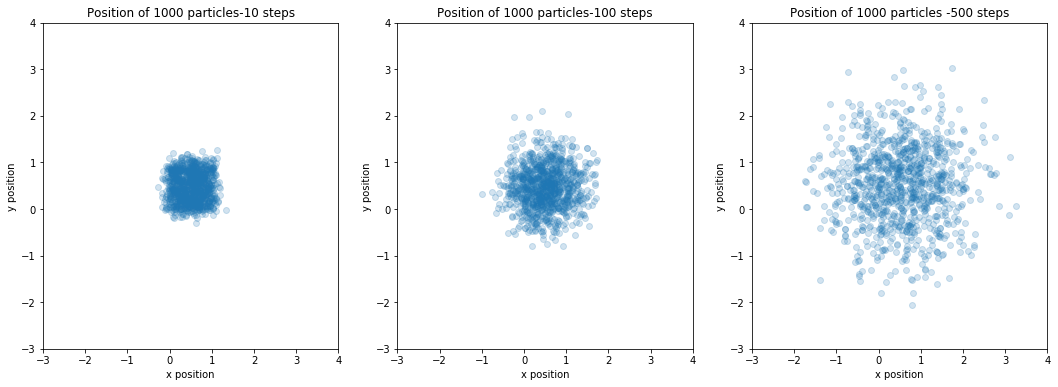

In [15]:
ndim=2
nwalkers=1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []

a = []
for i in range(nwalkers):
    w = walker(rand_pos[i], ndim =2, step_size=0.05)
    ys = w.doSteps(10)
    a.append(ys)
    x1.append(a[i][10][0])
    y1.append(a[i][10][1])
    
b = []
for i in range (nwalkers):
    w = walker(rand_pos[i], ndim = 2, step_size=0.05)
    ys = w.doSteps(100)
    b.append(ys)
    x2.append(b[i][100][0])
    y2.append(b[i][100][1])
    
c= []
for i in range (nwalkers):
    w = walker(rand_pos[i], ndim = 2, step_size = 0.05)
    ys = w.doSteps(500)
    c.append(ys)
    x3.append(c[i][500][0])
    y3.append(c[i][500][1])
    
# this code is a template to create 3 subplots in one, adapt it to your task!

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.xlim((-3,4))
plt.ylim((-3,4))
plt.scatter(x1,y1, alpha = 0.2)
plt.title('Position of 1000 particles-10 steps')
plt.xlabel('x position')
plt.ylabel('y position')

plt.subplot(132)
plt.xlim((-3,4))
plt.ylim((-3,4))
plt.scatter(x2,y2,alpha=0.2)
plt.title('Position of 1000 particles-100 steps')
plt.xlabel('x position')
plt.ylabel('y position')

plt.subplot(133)
plt.xlim((-3,4))
plt.ylim((-3,4))
plt.scatter(x3,y3,alpha=0.2)
plt.title('Position of 1000 particles -500 steps')
plt.xlabel('x position')
plt.ylabel('y position')